In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_AL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0
1,1,1,2,0,0,0,3.0,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2,NaN,7
2,2,2,1,0,0,0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,7
3,2,2,2,1,0,0,2.0,0.0,2.0,2.0,...,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2,0.0,7
4,2,2,1,0,0,0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,3.0,0.0,2.0,2.0,2,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3,0.0,70
354,2,3,2,0,0,0,0.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,70
355,2,2,2,1,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2,0.0,70
356,2,1,0,3,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,70


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
int64		column 3	0
int64		column 4	0
int64		column 5	0
int64		column 6	0
float64		column 7	35
float64		column 8	141
float64		column 9	105
float64		column 10	141
int64		column 11	0
float64		column 12	141
int64		column 13	0
float64		column 14	35
int64		column 15	0
float64		column 16	141
int64		column 17	0
int64		column 18	0
float64		column 19	71
float64		column 20	36
float64		column 21	141
float64		column 22	141
float64		column 23	105
float64		column 24	141
float64		column 25	141
float64		column 26	106
float64		column 27	141
float64		column 28	106
float64		column 29	141
float64		column 30	141
float64		column 31	106
int64		column 32	0
float64		column 33	141
int64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,323.000000,217.000000,253.000000,217.000000,...,217.000000,252.000000,217.000000,252.000000,217.000000,217.000000,252.000000,358.000000,217.000000,358.000000
mean,2.078212,1.807263,1.569832,1.354749,0.636872,0.449721,0.164087,0.391705,0.596838,0.529954,...,0.414747,0.416667,0.474654,0.980159,0.488479,0.078341,0.099206,1.877095,0.599078,36.296089
std,0.664865,0.701541,0.900909,1.135062,0.908709,0.956468,0.574574,0.832514,0.973615,0.918068,...,0.883681,0.840342,0.976840,1.141225,0.981828,0.357902,0.430509,0.699324,1.142852,15.324557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

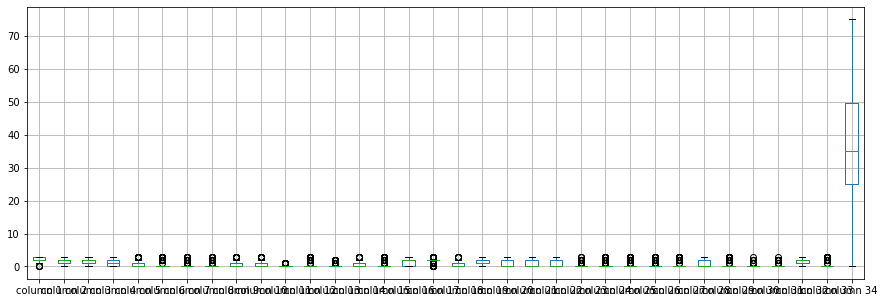

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.078212
column 2      1.807263
column 3      1.569832
column 4      1.354749
column 5      0.636872
column 6      0.449721
column 7      0.164087
column 8      0.391705
column 9      0.596838
column 10     0.529954
column 11     0.122905
column 12     0.433180
column 13     0.142458
column 14     0.523220
column 15     0.315642
column 16     1.423963
column 17     1.955307
column 18     0.511173
column 19     1.344948
column 20     0.673913
column 21     0.967742
column 22     0.654378
column 23     0.241107
column 24     0.400922
column 25     0.414747
column 26     0.416667
column 27     0.474654
column 28     0.980159
column 29     0.488479
column 30     0.078341
column 31     0.099206
column 32     1.877095
column 33     0.599078
column 34    36.296089
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.428769,0.248062,-0.033157,-0.008496,0.028225,-0.092628,-0.026414,0.102937,0.159710,...,-0.031351,0.108057,-0.005105,0.027109,-0.000917,0.092695,0.060441,0.093026,-0.031362,-0.005028
column 2,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.075013,-0.074615,-0.101724,0.212120,0.262158,...,-0.106462,0.192019,-0.126891,0.074244,-0.158367,0.021240,-0.004374,-0.008453,-0.171923,0.016006
column 3,0.248062,0.347106,1.000000,-0.058534,0.239778,0.322657,-0.136631,0.292215,0.285093,0.267465,...,0.287376,0.322597,0.304197,-0.249319,0.282958,-0.114347,-0.158650,0.124812,0.265406,0.138493
column 4,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.412525,-0.151904,0.365953,-0.274436,-0.185116,...,0.367486,-0.149668,0.380876,0.033433,0.382078,-0.137238,-0.134296,0.051553,0.392605,0.048053
column 5,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.388233,-0.167523,0.418890,-0.050535,-0.017018,...,0.421832,-0.012781,0.400655,-0.011102,0.434634,-0.150606,-0.156793,0.110295,0.411513,0.081162
column 6,0.028225,-0.075013,0.322657,0.412525,0.388233,1.000000,-0.135499,0.870864,-0.270468,-0.263476,...,0.856589,-0.073117,0.921680,0.088454,0.905312,-0.105841,-0.110170,0.258753,0.898526,0.096953
column 7,-0.092628,-0.074615,-0.136631,-0.151904,-0.167523,-0.135499,1.000000,-0.128511,0.200775,0.020839,...,-0.128192,-0.128419,-0.132717,0.027470,-0.135889,0.779678,0.828237,-0.089766,-0.135208,-0.362741
column 8,-0.026414,-0.101724,0.292215,0.365953,0.418890,0.870864,-0.128511,1.000000,-0.282266,-0.272858,...,0.879428,-0.066343,0.886121,0.123798,0.880626,-0.103466,-0.103654,0.290266,0.881113,0.078102
column 9,0.102937,0.212120,0.285093,-0.274436,-0.050535,-0.270468,0.200775,-0.282266,1.000000,0.735820,...,-0.248978,0.477074,-0.271851,-0.400360,-0.269141,0.163696,0.176755,-0.070176,-0.264080,-0.143279
column 10,0.159710,0.262158,0.267465,-0.185116,-0.017018,-0.263476,0.020839,-0.272858,0.735820,1.000000,...,-0.266474,0.527433,-0.266302,-0.441927,-0.273114,0.028050,0.052803,0.017632,-0.259868,-0.017022


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [21]:
imputer = md.Midas(layer_structure = [34,34+89,34+89+89,34+89+89+89,34+89+89+89+89,34+89+89+89+89+89,34+89+89+89+89+89+89,34+89+89+89+89+89+89+89,34+89+89+89+89+89+89,34+89+89+89+89+89,34+89+89+89+89,34+89+89+89,34+89+89,34+89,34], vae_layer = False, seed = 89)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 69.34925530173562
Epoch: 1 , loss: 69.64032762700862
Epoch: 2 , loss: 69.23176314614035
Epoch: 3 , loss: 68.59116051413797
Epoch: 4 , loss: 66.58731616627087
Epoch: 5 , loss: 65.51918272538619
Epoch: 6 , loss: 64.20906569740988
Epoch: 7 , loss: 63.59958267211914
Epoch: 8 , loss: 62.97669653459029
Epoch: 9 , loss: 62.844436992298476
Epoch: 10 , loss: 62.024363951249555
Epoch: 11 , loss: 61.78421956842596
Epoch: 12 , loss: 61.40369762073863
Epoch: 13 , loss: 60.88301502574574
Epoch: 14 , loss: 60.65646899830211
Epoch: 15 , loss: 60.355361071499914
Epoch: 16 , loss: 60.02274703979492
Epoch: 17 , loss: 60.14561167630282
Epoch: 18 , loss: 59.51995069330389
Epoch: 19 , loss: 59.38731505654075
Epoch: 20 , loss: 58.76336669921875
Epoch: 21 , loss: 59.018272920088336
Epoch: 22 , loss: 59.00247244401412
Epoch: 23 , loss: 58.386373866688125
Epoch: 24 , loss: 58.062869332053445
Epoch: 25 , loss: 57.05287863991477


In [22]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [23]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.000000
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      0.055929
column 8      0.363717
column 9      0.392655
column 10     0.422486
column 11     0.000000
column 12     0.352573
column 13     0.000000
column 14     0.374516
column 15     0.000000
column 16     1.413848
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     1.006877
column 22     0.352450
column 23     0.291657
column 24     0.351575
column 25     0.351982
column 26     0.338161
column 27     0.286697
column 28     0.000000
column 29     0.311615
column 30     0.116839
column 31     1.000000
column 32     1.000000
column 33     0.427905
column 34    12.000000
Name: 21, dtype: float64

In [24]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [25]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
1,0,0,0,0,0,0,0.0,0.283499,-2.469659,0.482956,...,0.228923,0.000000,0.246240,0.792404,0.212226,-1.924720,-1.986873,0,0.344829,0
2,0,0,0,0,0,0,0.0,0.313844,-1.779109,0.320348,...,0.356579,0.337155,0.310804,-1.051921,0.320721,-2.910544,-3.000488,0,0.388258,0
3,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
4,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
354,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
355,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
356,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0


Calculating NRMSE Value

In [26]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [27]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [28]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(46.79308426282544, 758.0725558942231)

In [29]:
NRMS=numerator/denominator
NRMS


0.06172639267705486

In [30]:
new_df.iloc[66,:]

column 1      2.0
column 2      0.0
column 3      0.0
column 4      3.0
column 5      0.0
column 6      0.0
column 7      0.0
column 8      0.0
column 9      0.0
column 10     0.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     0.0
column 15     2.0
column 16     2.0
column 17     2.0
column 18     0.0
column 19     0.0
column 20     0.0
column 21     3.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     0.0
column 32     2.0
column 33     0.0
column 34    22.0
Name: 66, dtype: float64

In [31]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,0,0.0,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,2.000000,0
1,1,1,2,0,0,0,3.0,0.283499,0.530341,0.482956,...,0.228923,0.000000,0.246240,0.792404,0.212226,0.075280,0.013127,2,0.344829,7
2,2,2,1,0,0,0,3.0,0.313844,0.220891,0.320348,...,0.356579,0.337155,0.310804,0.948079,0.320721,0.089456,-0.000488,2,0.388258,7
3,2,2,2,1,0,0,2.0,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,2.000000,2,0.000000,7
4,2,2,1,0,0,0,2.0,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,2.000000,2,0.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3,0.000000,70
354,2,3,2,0,0,0,0.0,0.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,70
355,2,2,2,1,0,0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2,0.000000,70
356,2,1,0,3,0,0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,70


In [32]:
imputations[-1].to_excel("DERM_AL_20(imp).xlsx", index=False, header=False)